In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from scipy import stats
import pylab

In [ ]:
df = pd.read_csv("/content/bank-additional-full.csv",sep = ';')

In [ ]:
df.shape

(41188, 21)

In [ ]:
df.iloc[:5,1:10]

,job,marital,education,default,housing,loan,contact,month,day_of_week
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon
1,services,married,high.school,unknown,no,no,telephone,may,mon
2,services,married,high.school,no,yes,no,telephone,may,mon
3,admin.,married,basic.6y,no,no,no,telephone,may,mon
4,services,married,high.school,no,no,yes,telephone,may,mon


In [ ]:
df.iloc[:5,10:]

,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.duplicated().sum()

12

In [ ]:
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
distinct_counts = []

# Loop through columns
for column in df.columns:
    distinct_count = df[column].nunique()  # Use nunique() to count distinct values
    first_5_unique_values = df[column].unique()[:5]
    last_5_unique_values = df[column].unique()[-5:]
    distinct_counts.append({
        'Column': column,
        'Distinct_Values_Count': distinct_count,
        'First_5_Unique_Values': first_5_unique_values,
        'Last_5_Unique_Values': last_5_unique_values
    })

# Create a DataFrame from the list of distinct value counts
distinct_counts_df = pd.DataFrame(distinct_counts)

# Display the DataFrame with distinct value counts
distinct_counts_df.sort_values(by='Distinct_Values_Count', ascending=False)

,Column,Distinct_Values_Count,First_5_Unique_Values,Last_5_Unique_Values
10,duration,1544,"[261, 149, 226, 151, 307]","[1640, 1616, 1246, 1556, 1868]"
18,euribor3m,316,"[4.857, 4.856, 4.855, 4.859, 4.86]","[1.039, 1.035, 1.03, 1.031, 1.028]"
0,age,78,"[56, 57, 37, 40, 45]","[98, 94, 84, 92, 89]"
11,campaign,42,"[1, 2, 3, 4, 5]","[37, 40, 33, 34, 43]"
12,pdays,27,"[999, 6, 4, 3, 5]","[25, 26, 19, 27, 20]"
17,cons.conf.idx,26,"[-36.4, -41.8, -42.7, -36.1, -40.4]","[-40.3, -38.3, -37.5, -49.5, -50.8]"
16,cons.price.idx,26,"[93.994, 94.465, 93.918, 93.444, 93.798]","[94.215, 94.027, 94.199, 94.601, 94.767]"
1,job,12,"[housemaid, services, admin., blue-collar, tec...","[unemployed, self-employed, unknown, entrepren..."
19,nr.employed,11,"[5191.0, 5228.1, 5195.8, 5176.3, 5099.1]","[5017.5, 5023.5, 5008.7, 4991.6, 4963.6]"
8,month,10,"[may, jun, jul, aug, oct]","[nov, dec, mar, apr, sep]"


In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
# Data Defining for Visualization and Processing
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
categorical_columns = df.select_dtypes(exclude=np.number).columns.tolist()

# Checking the Columns
numeric_columns, categorical_columns

(['age',
  'duration',
  'campaign',
  'pdays',
  'previous',
  'emp.var.rate',
  'cons.price.idx',
  'cons.conf.idx',
  'euribor3m',
  'nr.employed'],
 ['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'poutcome',
  'y'])

In [ ]:
from sklearn.model_selection import train_test_split

# Train-Test Split Executing Initially To Prevent Data Leakage
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:20],df.iloc[:,-1],test_size=0.3, random_state=35)

# Converting y_train, y_test back to DataFrame
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((28823, 20), (28823, 1), (12353, 20), (12353, 1))

In [ ]:
Poutcome = round(len(df[df['poutcome'] == 'nonexistent']) / len(df) * 100)
print(f"Percentage of NonExistent Data: {Poutcome}%")

Percentage of NonExistent Data: 86%


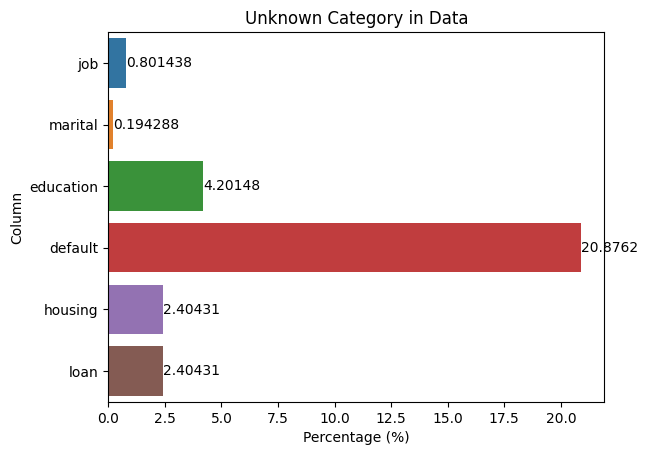

In [ ]:
df_unknown = pd.DataFrame(columns=['Column Name', 'Unknown Count'])

for column in df[categorical_columns]:
    unknown_count = len(df[df[column] == 'unknown'])/len(df)*100
    if unknown_count > 0:
        df_unknown = pd.concat([df_unknown, pd.DataFrame({'Column': [column], 'Unknown': [unknown_count]})], ignore_index=True)

ax = sns.barplot(data=df_unknown,y='Column',x='Unknown')
ax.set_title("Unknown Category in Data")
ax.set_xlabel("Percentage (%)")
for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
# Dropping Poutcome
X_train.drop(['poutcome'],axis=1,inplace=True)
X_test.drop(['poutcome'],axis=1,inplace=True)

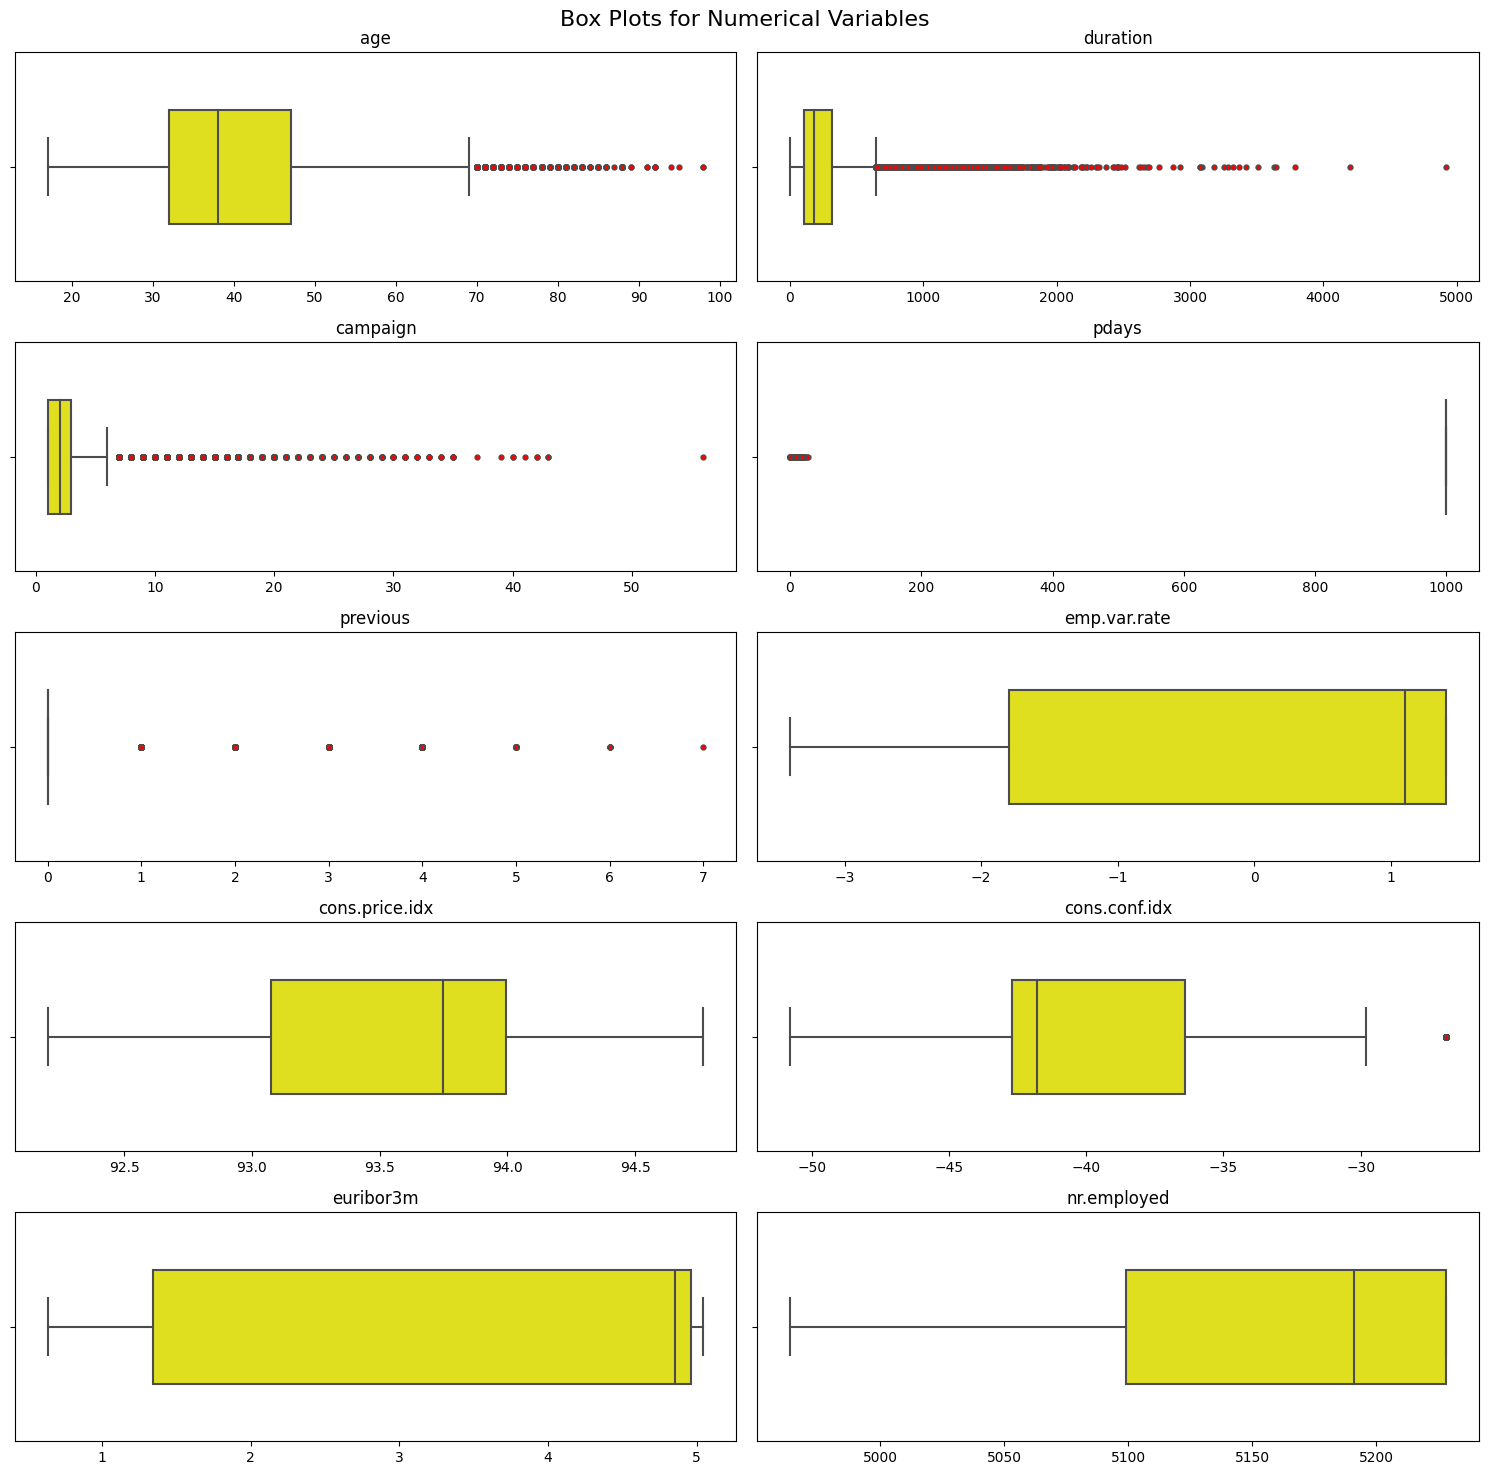

In [ ]:
fig,axes = plt.subplots(5,2,figsize=(15,15))

def plot_two(feat,i,j):
    sns.boxplot(x=df[feat],color='yellow', width=0.5, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 3.5}, ax=axes[i,j])
    axes[i, j].set_title(feat)
    axes[i, j].set_xlabel('')

for i,feat in enumerate(numeric_columns):
    j = i%2 #0 or 1
    plot_two(feat,i//2,j)
    warnings.filterwarnings("ignore", category=UserWarning)

fig.suptitle('Box Plots for Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Outlier Removal by Percentile Method

outlier_features_1 = ['age','duration','campaign']

# Define the percentile threshold
percentile_threshold = 99.5

# Function to remove outliers from a DataFrame
def remove_outliers(data, features):
    ignored_rows = set()  # Create a set to keep track of ignored rows

    for column in features:
        if column in data[column]:
            percentile = np.percentile(data[column], percentile_threshold)

            # Drop rows that are not in the ignored set and exceed the percentile
            data.drop(data[(data[column] > percentile) & (~data.index.isin(ignored_rows))].index, inplace=True)

            # Add the dropped rows to the ignored set
            ignored_rows.update(data[data[column] > percentile].index)

remove_outliers(X_train, outlier_features_1)
remove_outliers(X_test, outlier_features_1)

FEATURE TRANSFORMATION

In [ ]:
def log_transformation(data,column):
    plt.figure(figsize=(15,5))

    plt.subplot(141)
    sns.histplot((data[column]),kde=True,color='red');

    plt.subplot(142)
    stats.probplot((data[column]), dist="norm", plot=pylab) ;

    plt.subplot(143)
    sns.histplot(np.log(data[column]+1),color="green",kde=True);

    plt.subplot(144)
    stats.probplot(np.log(data[column]+1), dist="norm", plot=pylab) ;

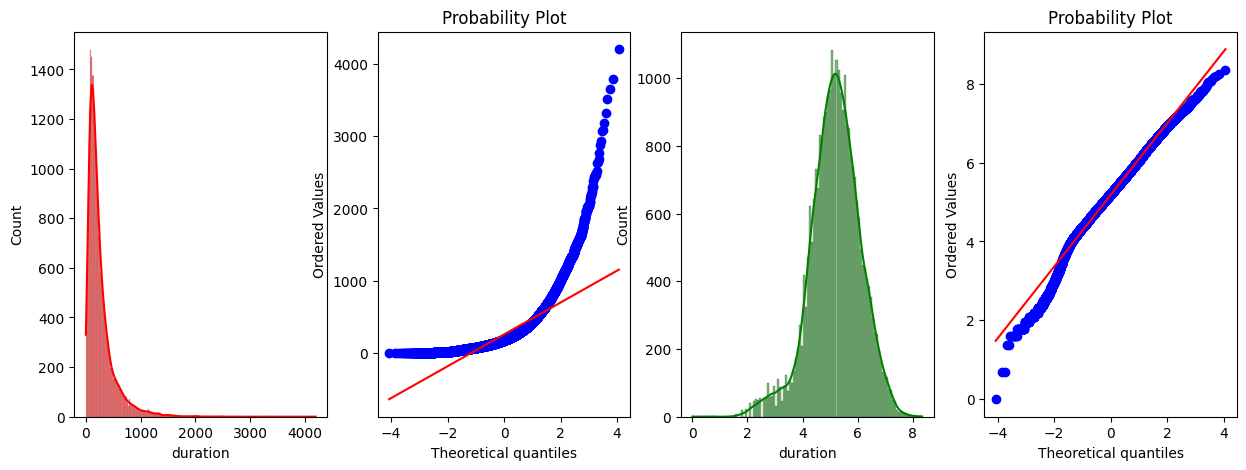

In [ ]:
log_transformation(X_train,'duration')

In [ ]:
X_train['duration'] = np.log(X_train['duration']+1)
X_test['duration'] = np.log(X_test['duration']+1)

FEATURE SCALING

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
columns=['age','campaign','previous','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','emp.var.rate']
X_train[columns] = scaler.fit_transform(X_train[columns])
X_test[columns] = scaler.transform(X_test[columns])

ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Target Variable Encoding
le = LabelEncoder()
y_train['y'] = le.fit_transform(y_train['y'])
y_test['y'] = le.fit_transform(y_test['y'])

# Default Variable Encoding
X_train['default'] = le.fit_transform(X_train['default'])
X_test['default'] = le.fit_transform(X_test['default'])
# One-Hot Encoding (k-1) Pandas Method
X_train = pd.concat([X_train, pd.get_dummies(X_train[['marital','housing','loan','contact','month','day_of_week']],prefix=['mar','hous','loan','cont','month','day'],drop_first=True, dtype=int)],axis=1)
X_test = pd.concat([X_test, pd.get_dummies(X_test[['marital','housing','loan','contact','month','day_of_week']],prefix=['mar','hous','loan','cont','month','day'],drop_first=True, dtype=int)], axis=1)

# Now Drop the Original Column
X_train = X_train.drop(['marital','housing','loan','contact','month','day_of_week'],axis=1)
X_test = X_test.drop(['marital','housing','loan','contact','month','day_of_week'],axis=1)
# Custom mapping function
def custom_mapping(value):
    if value == 999:
        return 0
    else:
        return 1

# Apply the custom mapping function to the 'pdays' column
X_train['pdays'] = X_train['pdays'].apply(custom_mapping)
X_test['pdays'] = X_test['pdays'].apply(custom_mapping)
# Define a custom mapping from job names to salary rank
custom_mapping = {
    'student': 1,
    'unemployed': 2,
    'housemaid': 3,
    'retired': 4,
    'blue-collar': 5,
    'services': 6,
    'self-employed': 7,
    'unknown': 8,
    'admin.': 9,
    'technician': 10,
    'entrepreneur': 11,
    'management': 12,

}

# Use the map function to apply the custom mapping to the 'job' column
X_train['job'] = X_train['job'].map(custom_mapping)
X_test['job'] = X_test['job'].map(custom_mapping)
# Define a custom mapping from education levels to rank
custom_mapping2 = {
    'illiterate': 1,              # Lowest education level
    'unknown': 2,
    'basic.4y': 3,
    'basic.6y': 4,
    'basic.9y': 5,
    'high.school': 6,
    'professional.course': 7,
    'university.degree': 8     # Highest education level
}

# Use the map function to apply the custom mapping to the 'education' column
X_train['education'] = X_train['education'].map(custom_mapping2)
X_test['education'] = X_test['education'].map(custom_mapping2)

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#Define the hyperparameter grid
param_grid = {
    'penalty': ['l2'],  # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [1000,1500,2000]
}

# Create the Logistic Regression model
log_model = LogisticRegression()

# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=log_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the GridSearchCV to your data
grid_search.fit(X_train, y_train.values.ravel())

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_log_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Hyperparameters: {'C': 1, 'max_iter': 1000, 'penalty': 'l2'}


In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(C=10, max_iter= 1000, penalty='l2')
log_model.fit(X_train,y_train.values.ravel())

LogisticRegression(C=10, max_iter=1000)

In [ ]:
y_train_pred = log_model.predict(X_train)
y_test_pred = log_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test,y_test_pred))

print("Accuracy train: ", accuracy_score(y_train, y_train_pred))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10976
           1       0.68      0.44      0.53      1377

    accuracy                           0.91     12353
   macro avg       0.81      0.71      0.74     12353
weighted avg       0.90      0.91      0.91     12353

Accuracy train:  0.9106269298823856
Accuracy test:  0.9145956447826439


CONFUSION MATRIX

Text(0.5, 23.52222222222222, 'Predicted label')

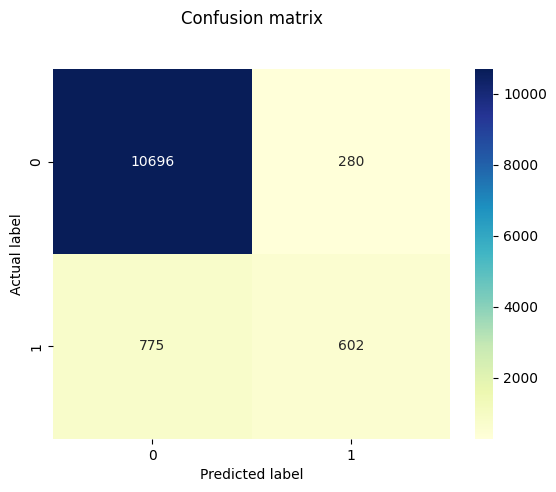

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

ROC-AUC CURVE


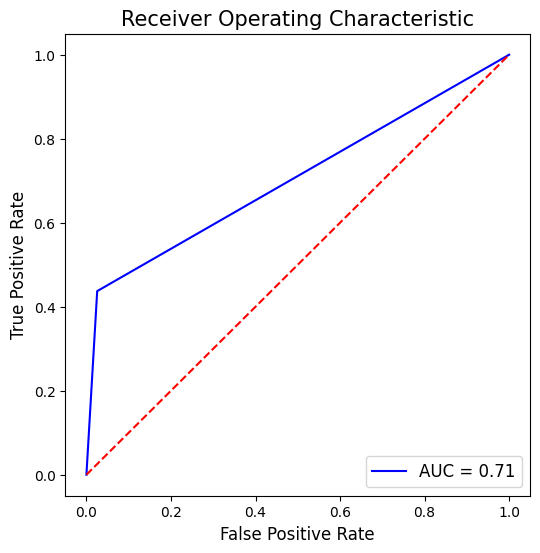

In [ ]:
from sklearn import metrics
fig, ax = plt.subplots(figsize = (6,6))
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, y_test_pred)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic',fontsize=15)
ax.set_ylabel('True Positive Rate',fontsize=12)
ax.set_xlabel('False Positive Rate',fontsize=12)
ax.legend(loc = 'lower right', prop={'size': 12})

plt.subplots_adjust(wspace=1)

KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN classifier
knn = KNeighborsClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_neighbors': list(range(1, 31))
}

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy',verbose=1, n_jobs=-1)

# Fit the GridSearchCV to your training data
grid_search.fit(X_train, y_train.values.ravel())

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters: {'n_neighbors': 9}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train,y_train.values.ravel())

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_train_pred2 = knn.predict(X_train)
y_test_pred2 = knn.predict(X_test)

CLASSIFICATION REPORT

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred2))

print("Accuracy train: ", accuracy_score(y_train, y_train_pred2))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred2))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10976
           1       0.62      0.31      0.41      1377

    accuracy                           0.90     12353
   macro avg       0.77      0.64      0.68     12353
weighted avg       0.88      0.90      0.89     12353

Accuracy train:  0.9157617180723727
Accuracy test:  0.9017242775034404


CONFUSION MATRIX

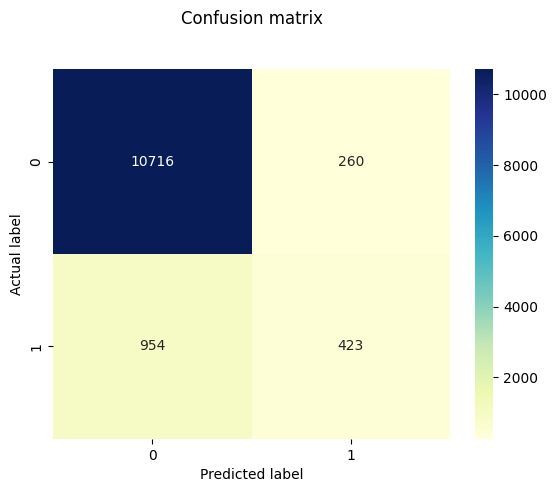

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred2)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

ROC-AUC CURVE


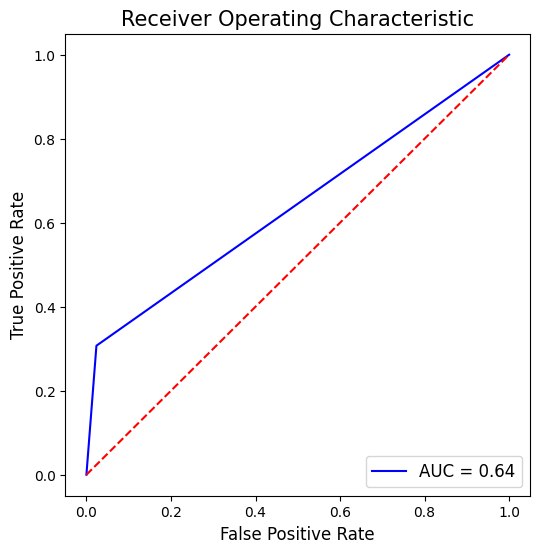

In [ ]:
from sklearn import metrics
fig, ax = plt.subplots(figsize = (6,6))
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, y_test_pred2)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic',fontsize=15)
ax.set_ylabel('True Positive Rate',fontsize=12)
ax.set_xlabel('False Positive Rate',fontsize=12)
ax.legend(loc = 'lower right', prop={'size': 12})

plt.subplots_adjust(wspace=1)